## Reto 2
Ahora que sabemos realizar análisis básico bivariado es momento de poner a prueba los conocimientos adquiridos en la clase para reforzar el aprendizaje

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Importamos las librerias necesarias para procesamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

Carga el dataset de beer_train.csv y muestra los primeros 15 datos

In [35]:
# Cargamos nuestro dataset para explorar los datos
path = '/content/drive/MyDrive/Introducción a AI Blockmakers/2 - Bivariado/beer_train.csv'
df = pd.read_csv(path, sep = ',')
# Visualizamos los 5 primeros datos:
df.head(15)

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.20,Specific Gravity,All Grain,NaN,20.00,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.00,American IPA
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.00,Irish Red Ale
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.00,Specific Gravity,All Grain,NaN,NaN,American Stout
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.00,American IPA
5,5,20.82,1.040,1.008,4.27,30.11,16.32,26.50,60,1.032,50.0,1.50,Specific Gravity,All Grain,NaN,26.67,American Amber Ale
6,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,Specific Gravity,All Grain,0.35,26.67,Saison
7,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale
8,8,18.93,1.048,1.008,5.31,13.87,6.08,28.39,60,1.032,65.0,NaN,Specific Gravity,BIAB,0.50,23.89,Saison
9,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA


In [36]:
df.drop(columns = ['SugarScale', 'BrewMethod', 'Style'], inplace=True, errors='ignore')
df.head(5)

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,NaN,20.0
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,0.50,20.0
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,0.35,20.0
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,NaN,NaN
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,0.75,20.0


Muestra cuántas filas y cuántas columnas contiene el dataset de cervezas (Tamaño del dataset)

In [37]:
print('El tamaño del dataset es:', df.shape)

El tamaño del dataset es: (24066, 14)


Obten la información relevante del dataset

In [38]:
# Obtenemos información referente al dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             24066 non-null  int64  
 1   Size(L)        24066 non-null  float64
 2   OG             24066 non-null  float64
 3   FG             24066 non-null  float64
 4   ABV            24066 non-null  float64
 5   IBU            24066 non-null  float64
 6   Color          24066 non-null  float64
 7   BoilSize       24066 non-null  float64
 8   BoilTime       24066 non-null  int64  
 9   BoilGravity    23130 non-null  float64
 10  Efficiency     24066 non-null  float64
 11  MashThickness  14200 non-null  float64
 12  PitchRate      10932 non-null  float64
 13  PrimaryTemp    16578 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 2.6 MB


Desglosa la estadística del data frame

In [39]:
# Desglosamos la estadística de nuestro dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,24066.0,12032.500000,6947.400125,0.000000,6016.2500,12032.500,18048.750,24065.00000
Size(L),24066.0,45.702692,186.624603,1.000000,18.9300,20.820,24.000,6102.08000
OG,24066.0,1.367517,2.039252,1.000000,1.0510,1.058,1.066,23.44500
FG,24066.0,1.065335,0.364336,0.598715,1.0110,1.013,1.016,7.74577
ABV,24066.0,6.005748,1.402203,0.000000,5.1800,5.880,6.680,49.96000
IBU,24066.0,52.305999,43.487405,0.000000,28.5225,43.310,65.780,1605.83000
Color,24066.0,10.171609,8.726041,0.000000,5.2500,7.280,11.140,108.65000
BoilSize,24066.0,51.652292,199.448712,1.000000,21.0000,28.000,30.000,6454.13000
BoilTime,24066.0,63.776573,12.091712,0.000000,60.0000,60.000,60.000,240.00000
BoilGravity,23130.0,1.321495,1.782509,0.000000,1.0400,1.047,1.057,38.30000


 Encuentra el número de elementos unicos dentro del data frame

In [40]:
# Cuenta el número de los diferentes elementos en el data frame
df.nunique()

Id               24066
Size(L)            672
OG                 697
FG                 605
ABV                980
IBU               9243
Color             3142
BoilSize          1171
BoilTime            47
BoilGravity        347
Efficiency         167
MashThickness      329
PitchRate            9
PrimaryTemp        134
dtype: int64

Crea una copia del data frame y nombrala como df_clean

In [41]:
df_clean = df.copy()

Muestra los primeros 10 datos del data frame df_clean

In [42]:
df_clean.head(10)

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.20,NaN,20.00
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,0.50,20.00
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,0.35,20.00
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.00,NaN,NaN
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,0.75,20.00
5,5,20.82,1.040,1.008,4.27,30.11,16.32,26.50,60,1.032,50.0,1.50,NaN,26.67
6,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,0.35,26.67
7,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,1.00,19.00
8,8,18.93,1.048,1.008,5.31,13.87,6.08,28.39,60,1.032,65.0,NaN,0.50,23.89
9,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,0.75,17.78


Elimina la columna de Id

In [43]:
df_clean = df_clean.drop(columns = ['Id'])
df_clean

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,NaN,20.00
1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,0.50,20.00
2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,0.35,20.00
3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,NaN,NaN
4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,0.75,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24061,22.00,1.056,1.009,6.13,51.28,6.54,25.00,60,1.049,70.0,NaN,0.75,18.00
24062,3.79,1.058,1.014,5.83,77.88,6.00,6.44,60,1.034,75.0,1.5,NaN,21.67
24063,10.00,1.055,1.015,5.20,20.24,14.68,14.00,60,1.039,70.0,3.0,NaN,NaN
24064,20.00,1.059,1.014,5.94,36.12,15.72,28.50,60,1.041,70.0,3.0,NaN,20.00


Busca todos los datos faltantes del data frame

In [44]:
# Buscamos todos datos nulos o faltantes dentro de cada categoría
df_clean.isna().sum()

Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity        936
Efficiency           0
MashThickness     9866
PitchRate        13134
PrimaryTemp       7488
dtype: int64

Elimina las columnas que contengan más del 20% de datos faltantes.
Recuerda que desde ahora usaremos df_clean y no el df original para no perder los datos originales!!!

Tip : 20% del dataset equivale a 4,813 datos

In [45]:
df_clean = df_clean.drop(columns = ['MashThickness', 'PitchRate', 'PrimaryTemp'])
df_clean

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency
0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0
1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0
2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0
3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0
4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0
...,...,...,...,...,...,...,...,...,...,...
24061,22.00,1.056,1.009,6.13,51.28,6.54,25.00,60,1.049,70.0
24062,3.79,1.058,1.014,5.83,77.88,6.00,6.44,60,1.034,75.0
24063,10.00,1.055,1.015,5.20,20.24,14.68,14.00,60,1.039,70.0
24064,20.00,1.059,1.014,5.94,36.12,15.72,28.50,60,1.041,70.0


Realiza un boxplot de la variable "OG"

<Axes: ylabel='OG'>

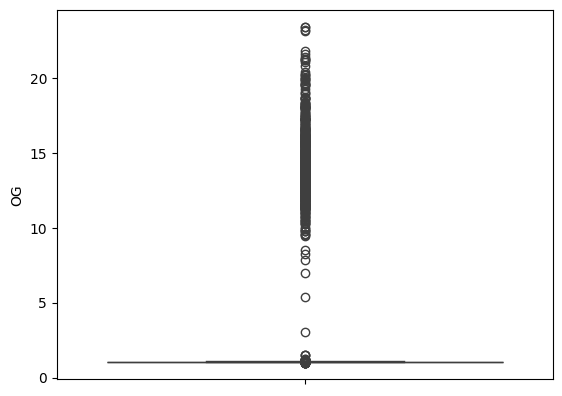

In [46]:
sns.boxplot(df_clean['OG'])

No se pueden apreciar los datos de una buena forma por lo que vamos a eliminar datos atípicos para obtener una mejor visualización de datos

Eliminemos datos atípicos para visualizar de una forma más clara los datos:

In [47]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),24066.0,45.702692,186.624603,1.000000,18.9300,20.820,24.000,6102.08000
OG,24066.0,1.367517,2.039252,1.000000,1.0510,1.058,1.066,23.44500
FG,24066.0,1.065335,0.364336,0.598715,1.0110,1.013,1.016,7.74577
ABV,24066.0,6.005748,1.402203,0.000000,5.1800,5.880,6.680,49.96000
IBU,24066.0,52.305999,43.487405,0.000000,28.5225,43.310,65.780,1605.83000
Color,24066.0,10.171609,8.726041,0.000000,5.2500,7.280,11.140,108.65000
BoilSize,24066.0,51.652292,199.448712,1.000000,21.0000,28.000,30.000,6454.13000
BoilTime,24066.0,63.776573,12.091712,0.000000,60.0000,60.000,60.000,240.00000
BoilGravity,23130.0,1.321495,1.782509,0.000000,1.0400,1.047,1.057,38.30000
Efficiency,24066.0,66.040676,14.131211,0.000000,65.0000,70.000,75.000,100.00000


En nuestra variable "OG", el 75% de nuestros datos se encuentran debajo de 1.066, sin embargo, el valor máximo es de 23.445, eliminemos cualquier valor arriba de 1.1 para poder visualizar los datos de una mejor forma:

In [48]:
df_clean = df_clean[df_clean['OG'] < 1.1]
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),23319.0,41.130418,165.156064,1.000,18.930,20.820,23.500,6102.080
OG,23319.0,1.058531,0.011715,1.000,1.051,1.058,1.065,1.099
FG,23319.0,1.013176,0.004045,0.999,1.010,1.013,1.015,1.062
ABV,23319.0,5.957662,1.214410,0.000,5.180,5.870,6.660,13.200
IBU,23319.0,52.157592,43.217498,0.000,28.500,43.280,65.670,1605.830
Color,23319.0,10.101405,8.585195,0.000,5.240,7.260,11.100,108.650
BoilSize,23319.0,46.711175,176.508390,1.000,20.820,27.630,30.000,6454.130
BoilTime,23319.0,63.691282,12.003299,0.000,60.000,60.000,60.000,240.000
BoilGravity,22401.0,1.051807,0.023310,1.000,1.040,1.047,1.055,1.500
Efficiency,23319.0,65.920001,14.149769,0.000,65.000,70.000,75.000,100.000


Ahora podemos ver con más claridad los datos de la variable "OG"

<Axes: ylabel='OG'>

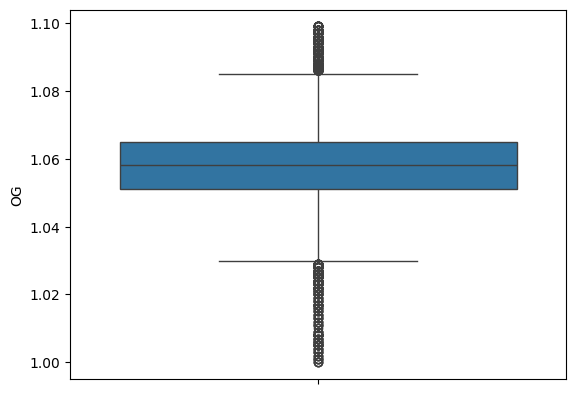

In [49]:
sns.boxplot(df_clean['OG'])

Realicemos el mismo ejercicio con la variable "IBU" Elimina todos los datos arriba de 125

<Axes: ylabel='IBU'>

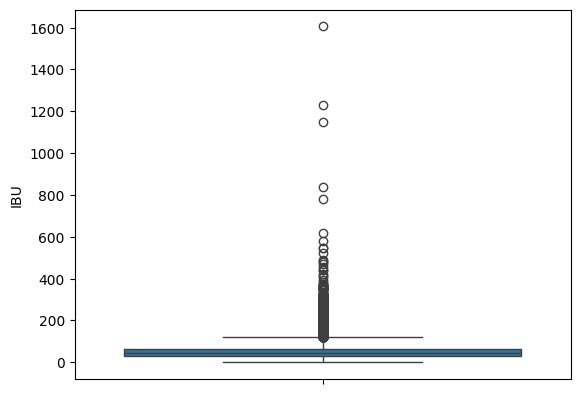

In [50]:
sns.boxplot(df_clean['IBU'])

In [51]:
df_clean = df_clean[df_clean['IBU'] < 125]
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),22349.0,41.716906,168.352146,1.000,18.930,20.820,23.660,6102.080
OG,22349.0,1.057957,0.011319,1.000,1.051,1.057,1.065,1.099
FG,22349.0,1.013051,0.003986,0.999,1.010,1.013,1.015,1.062
ABV,22349.0,5.898373,1.170072,0.000,5.160,5.820,6.580,13.200
IBU,22349.0,46.201196,26.056036,0.000,27.880,41.950,62.630,124.990
Color,22349.0,10.131885,8.646686,0.000,5.210,7.250,11.160,108.650
BoilSize,22349.0,47.314910,179.925205,1.000,20.820,27.500,30.000,6454.130
BoilTime,22349.0,63.472504,11.847112,0.000,60.000,60.000,60.000,240.000
BoilGravity,21497.0,1.051411,0.023141,1.000,1.040,1.046,1.055,1.500
Efficiency,22349.0,66.012967,14.103146,0.000,65.000,70.000,75.000,100.000


<Axes: ylabel='IBU'>

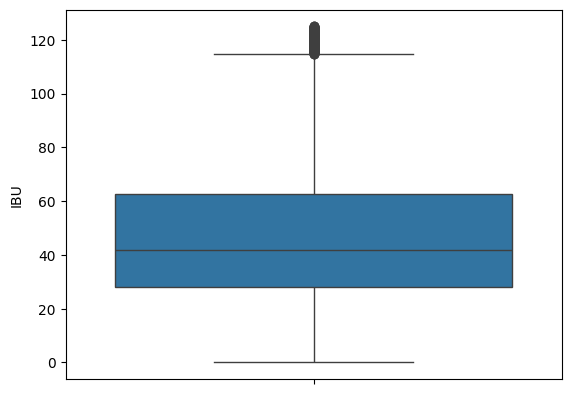

In [52]:
sns.boxplot(df_clean['IBU'])

# OPCIONAL:
Realiza el balanceo de datos de todas las variables que consideres atípicas

# Comenzamos nuestro análisis bivariado:

In [53]:
df_clean.head(10)

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency
0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0
2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0
3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0
4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0
5,20.82,1.040,1.008,4.27,30.11,16.32,26.50,60,1.032,50.0
6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0
7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0
8,18.93,1.048,1.008,5.31,13.87,6.08,28.39,60,1.032,65.0
9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0
10,20.82,1.058,1.010,6.29,64.35,3.86,28.39,60,1.042,80.0


Crea la matriz de correlaciones entre variables

In [60]:
# Determinamos correlaciones entre variables
df_corr = df_clean.corr() #Compute pairwise correlation of columns, excluding NA/null values.
df_corr.style.background_gradient(cmap='Greens') #
# BONUS: Lista de colores en CMAPS
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency
Size(L),1.000000,-0.024550,-0.030053,-0.017519,-0.054218,-0.015574,0.996020,0.037623,0.009488,0.098114
OG,-0.024550,1.000000,0.720576,0.949798,0.425441,0.212173,-0.021576,0.079402,0.365106,0.111065
FG,-0.030053,0.720576,1.000000,0.472214,0.267630,0.272585,-0.029539,0.027768,0.286475,0.044844
ABV,-0.017519,0.949798,0.472214,1.000000,0.422590,0.148239,-0.014009,0.088953,0.337527,0.121447
IBU,-0.054218,0.425441,0.267630,0.422590,1.000000,0.039209,-0.053453,0.043410,0.140517,-0.041366
Color,-0.015574,0.212173,0.272585,0.148239,0.039209,1.000000,-0.014908,0.009559,0.082196,-0.031271
BoilSize,0.996020,-0.021576,-0.029539,-0.014009,-0.053453,-0.014908,1.000000,0.044910,-0.020372,0.113322
BoilTime,0.037623,0.079402,0.027768,0.088953,0.043410,0.009559,0.044910,1.000000,-0.082289,0.165190
BoilGravity,0.009488,0.365106,0.286475,0.337527,0.140517,0.082196,-0.020372,-0.082289,1.000000,-0.333011
Efficiency,0.098114,0.111065,0.044844,0.121447,-0.041366,-0.031271,0.113322,0.165190,-0.333011,1.000000


Compara todas las variables con correlacion mayor a 0.5 con su respectivo hexplot

<Axes: xlabel='OG', ylabel='ABV'>

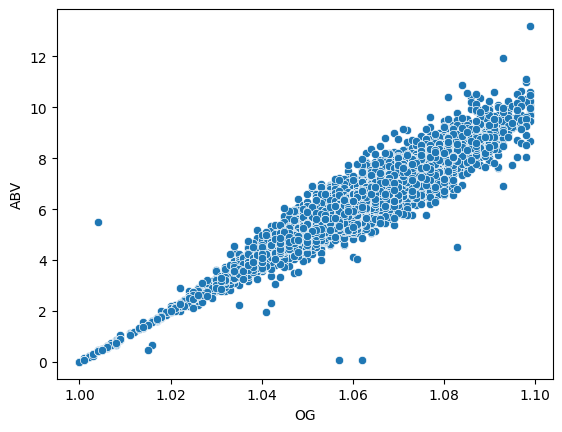

In [61]:
# Escribe tu codigo:

sns.scatterplot(x="OG", y="ABV", data=df_clean)


<Axes: xlabel='OG', ylabel='ABV'>

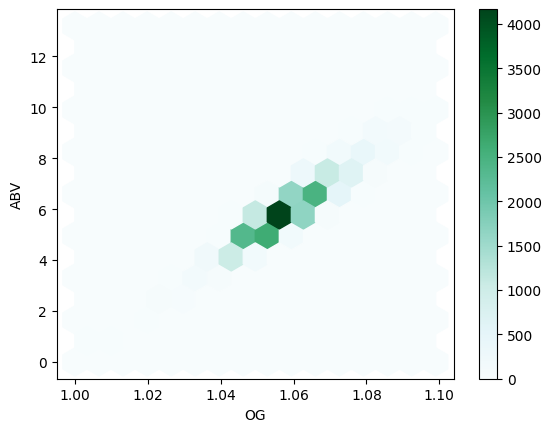

In [62]:
df_clean.plot.hexbin(x='OG', y='ABV', gridsize=15)

<Axes: xlabel='OG', ylabel='FG'>

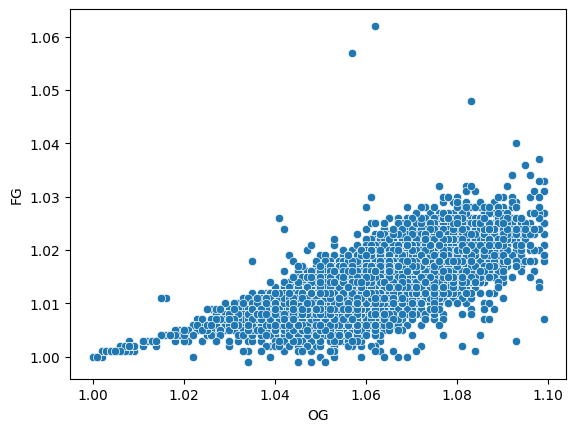

In [64]:
# Escribe tu codigo:

sns.scatterplot(x="OG", y="FG", data=df_clean)


<Axes: xlabel='Size(L)', ylabel='BoilSize'>

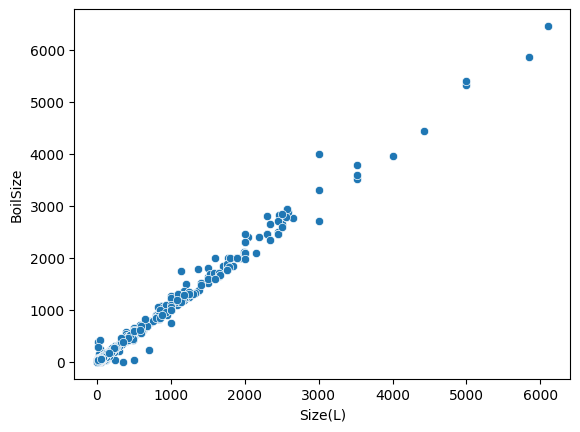

In [67]:
# Escribe tu codigo:

sns.scatterplot(x="Size(L)", y="BoilSize", data=df_clean)


Realiza una comparación entre todas las variables numéricas TIP: usa "pairplot"

In [68]:
# Escribe tu codigo:
sns.pairplot(df_clean)

Output hidden; open in https://colab.research.google.com to view.